## [LlamaIndex Integration(Call back)](https://langfuse.com/guides/cookbook/integration_llama-index-callback)


This is a new integration

### Step 0: Setup

In [10]:
# %pip uninstall llama-index
%pip install llama-index llama-index-llms-langchain "langfuse<3.0.0" --upgrade
%pip install llama-index-embeddings-langchain

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/76/69/08584fbd69e14398d3932a77d0c8d7e20389da3e6470210d6719afba2801/langfuse-2.60.10-py3-none-any.whl (275 kB)
  Attempting uninstall: langfuse
    Found existing installation: langfuse 3.10.0
    Uninstalling langfuse-3.10.0:
      Successfully uninstalled langfuse-3.10.0
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#%pip install -U langfuse llama-index llama-index-llms-langchain llama-index-embeddings-langchain langchain-openai

### Step 1: Configure Langfuse SDK

In [8]:
import os

os.environ["LANGFUSE_PUBLIC_KEY"] = "pk-lf-962190cc-b2bd-47c0-b752-8de287a2a5c1"
os.environ["LANGFUSE_SECRET_KEY"] = "sk-lf-4e9959c3-0935-4142-b789-734beb81d15a"
os.environ["LANGFUSE_HOST"] = "http://localhost:3000"

os.environ["OPENAI_API_KEY"] = "73c80b33ad68446ea3f059efe5c1a65f.T2PZjYiHcT2JYx2a"
os.environ["OPENAI_API_BASE"] = "https://open.bigmodel.cn/api/paas/v4"

In [9]:
from llama_index.core import Settings
from llama_index.core.callbacks import CallbackManager
from langfuse.llama_index import LlamaIndexCallbackHandler
from langchain_openai.chat_models import ChatOpenAI
from langchain_openai.embeddings import OpenAIEmbeddings


langfuse_callback_handler = LlamaIndexCallbackHandler(
    public_key=os.environ.get("LANGFUSE_PUBLIC_KEY", "pk-lf-REPLACE"),
    secret_key=os.environ.get("LANGFUSE_SECRET_KEY", "sk-lf-REPLACE"),
    host=os.environ.get("LANGFUSE_HOST", "http://localhost:3000"),
)

Settings.callback_manager = CallbackManager([langfuse_callback_handler])


# 初始化嵌入模型
embed_model = OpenAIEmbeddings(
    model="embedding-3",
)

# 初始化 LLM
llm = ChatOpenAI(
    model_name="glm-4.5-flash",
)

# 设置为全局默认
Settings.embed_model = embed_model
Settings.llm = llm

ModuleNotFoundError: No module named 'langfuse.llama_index'

### Step 1: Index

In [29]:
# Example context, thx ChatGPT
from llama_index.core import Document
 
doc1 = Document(text="""
Maxwell "Max" Silverstein, a lauded movie director, screenwriter, and producer, was born on October 25, 1978, in Boston, Massachusetts. A film enthusiast from a young age, his journey began with home movies shot on a Super 8 camera. His passion led him to the University of Southern California (USC), majoring in Film Production. Eventually, he started his career as an assistant director at Paramount Pictures. Silverstein's directorial debut, “Doors Unseen,” a psychological thriller, earned him recognition at the Sundance Film Festival and marked the beginning of a successful directing career.
""")
doc2 = Document(text="""
Throughout his career, Silverstein has been celebrated for his diverse range of filmography and unique narrative technique. He masterfully blends suspense, human emotion, and subtle humor in his storylines. Among his notable works are "Fleeting Echoes," "Halcyon Dusk," and the Academy Award-winning sci-fi epic, "Event Horizon's Brink." His contribution to cinema revolves around examining human nature, the complexity of relationships, and probing reality and perception. Off-camera, he is a dedicated philanthropist living in Los Angeles with his wife and two children.
""")

In [30]:
# Example index construction + LLM query
from llama_index.core import VectorStoreIndex

# 构建索引
index = VectorStoreIndex.from_documents([doc1,doc2], show_progress=True)

# 构建查询引擎并使用
# query_engine = index.as_query_engine()


Parsing nodes:   0%|          | 0/2 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/2 [00:00<?, ?it/s]

### Step 2: Query

In [31]:
# Query
response = index.as_query_engine().query("What did he do growing up?")
print(response)

Growing up, he was a film enthusiast who made home movies using a Super 8 camera.


[Query trace](http://localhost:3000/project/cmcoo14lx0006ph077uy36drf/traces?peek=81a4682f-a8da-474d-9bf7-2e9f05163347&timestamp=2025-09-04T08%3A54%3A37.873Z&observation=f6562378-8d3a-4c55-9367-b37fb31ac869)

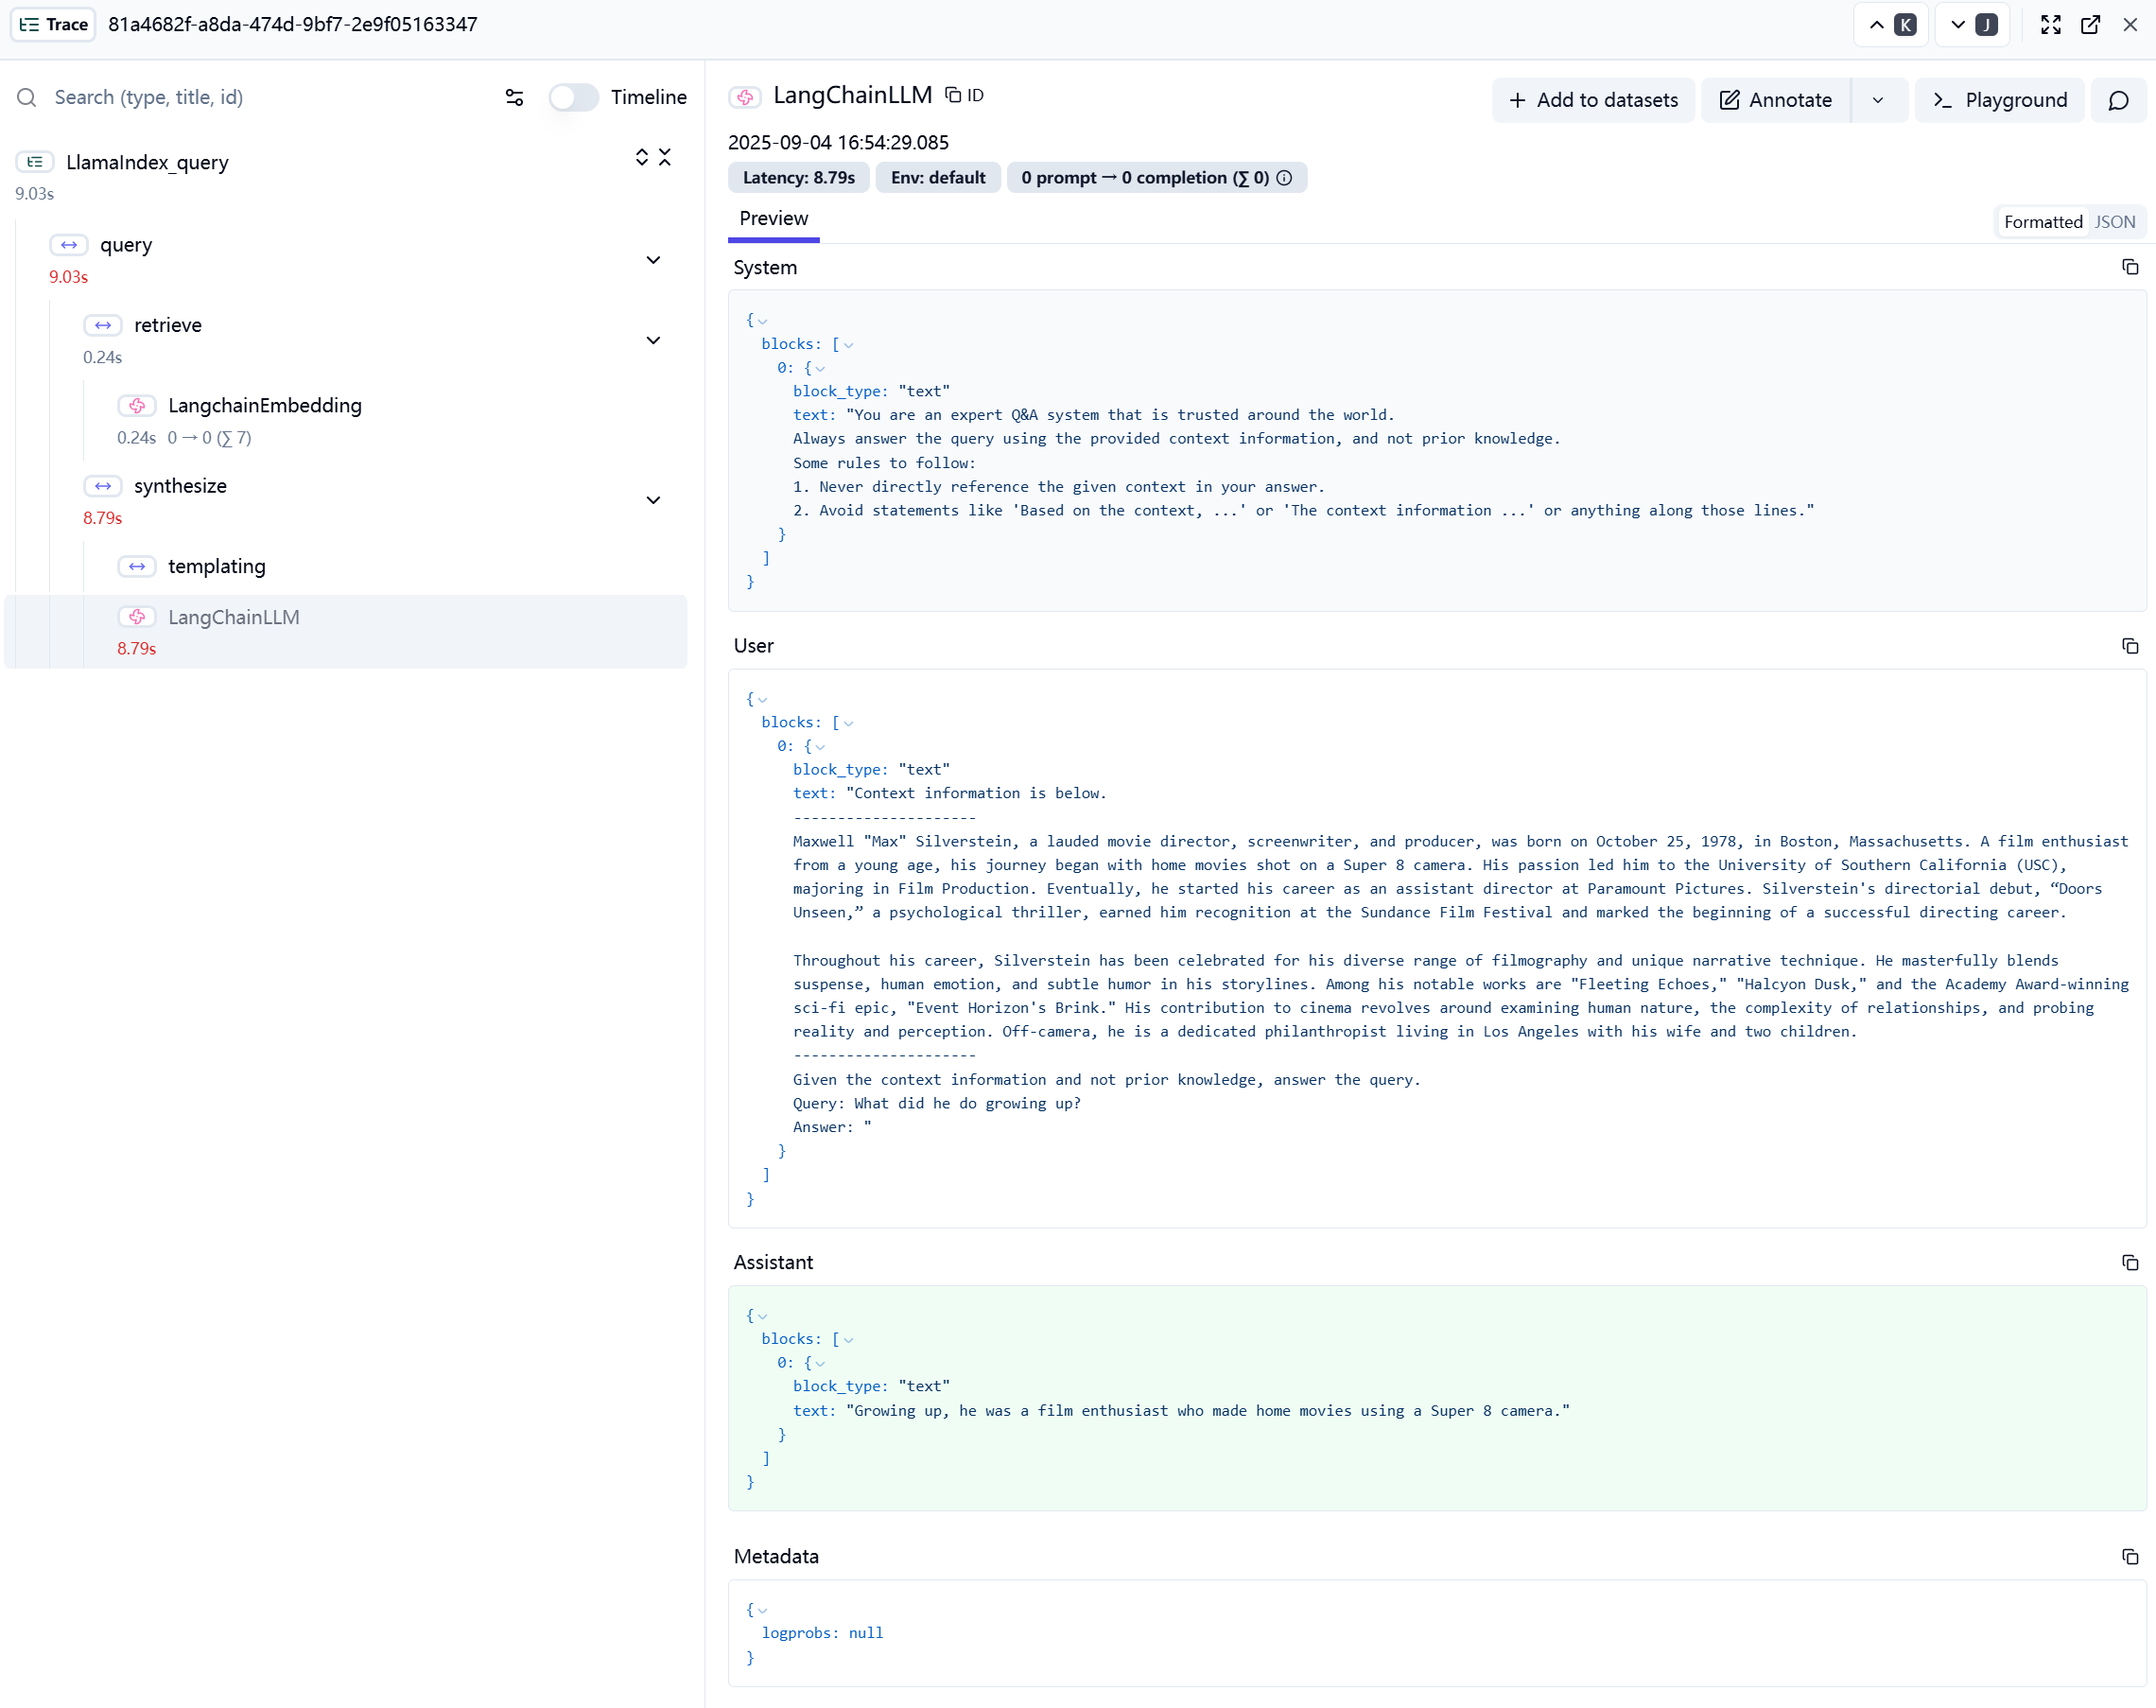

In [32]:
# Chat
response = index.as_chat_engine().chat("What did he do growing up?")
print(response)

Based on the documents provided, Maxwell Silverstein was a film enthusiast from a young age. His journey began with making home movies shot on a Super 8 camera. The documents don't provide specific details about other activities he might have done while growing up beyond his early interest in filmmaking.


[Chat trace](http://localhost:3000/project/cmcoo14lx0006ph077uy36drf/traces?peek=7e03c547-04c5-4e0e-9f2a-405f6a6c3f7e&timestamp=2025-09-04T08%3A54%3A46.488Z&observation=f484fc33-e710-44f3-93c6-168566711c99)

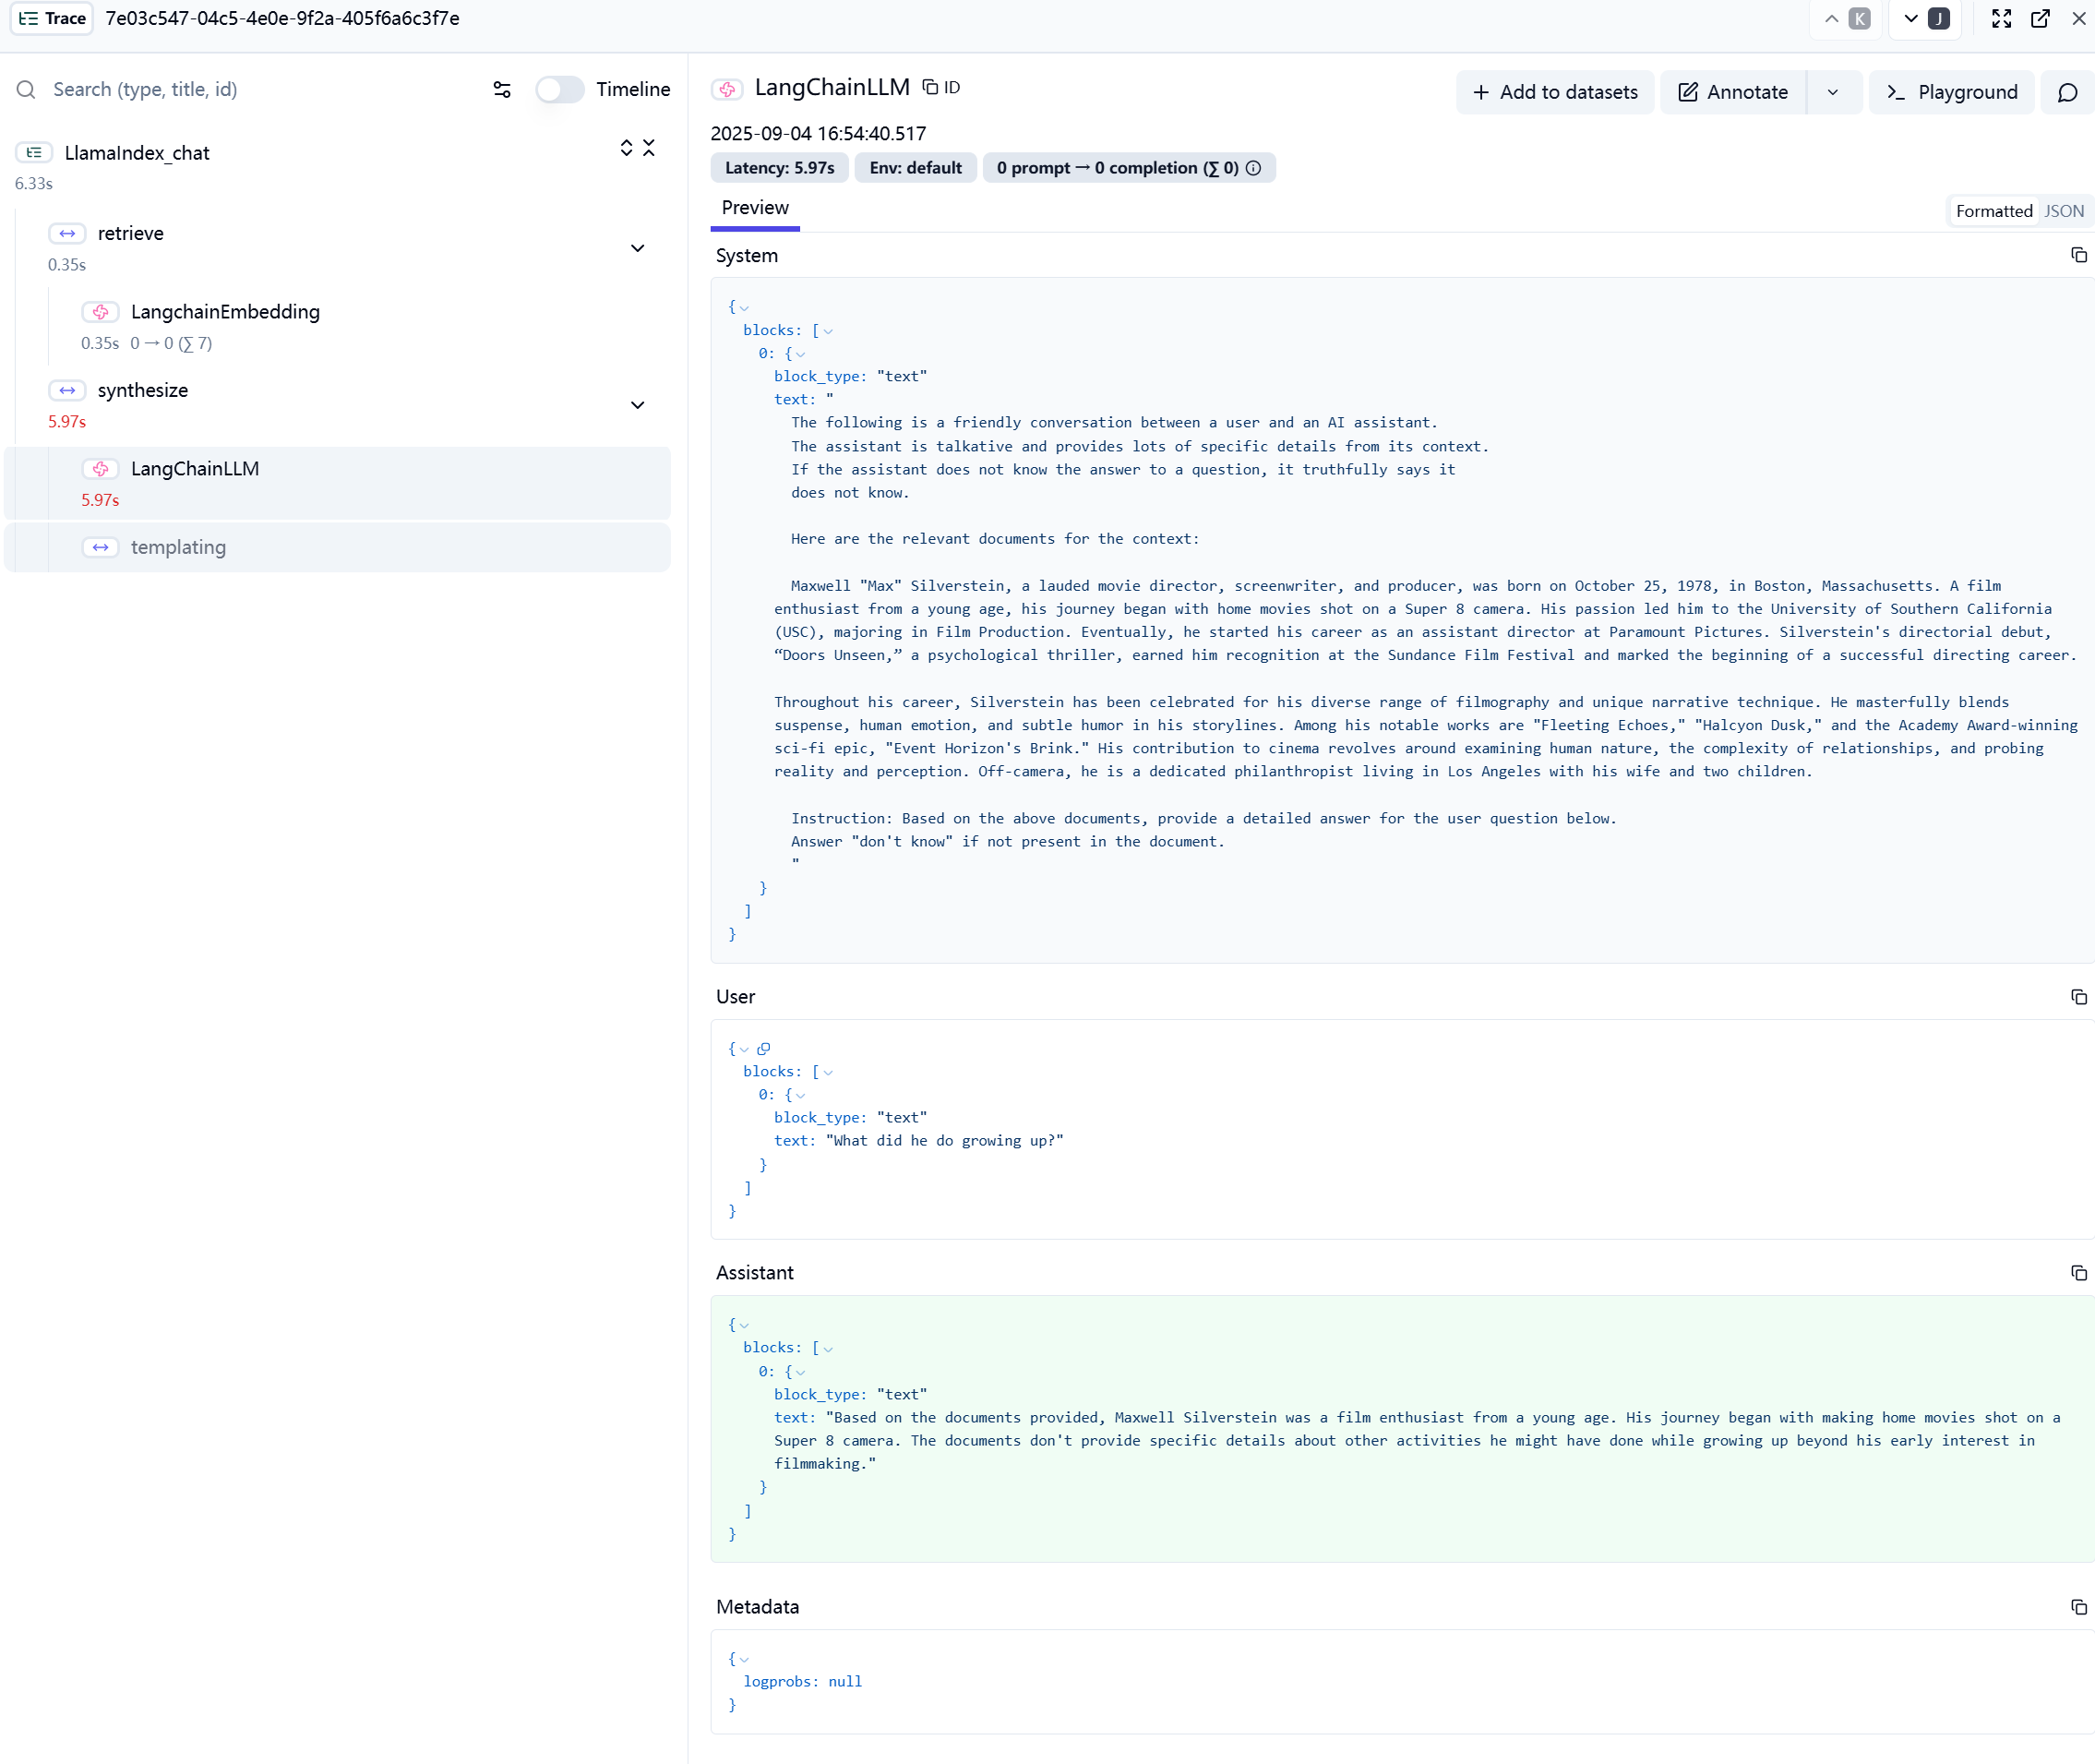

### Step3: Explore traces in Langfuse

In [34]:
# As we want to immediately see result in Langfuse, we need to flush the callback handler
langfuse_callback_handler.flush()

In [36]:
%pip install langfuse --upgrade

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/dc/46/edd370d47ca72ed4ca36b3c3b8f3a4ce71a310629d0bcb6ed760b04b08b1/langfuse-3.3.4-py3-none-any.whl (318 kB)
  Attempting uninstall: langfuse
    Found existing installation: langfuse 2.60.9
    Uninstalling langfuse-2.60.9:
      Successfully uninstalled langfuse-2.60.9
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langfuse-haystack 2.2.0 requires langfuse<3.0.0,>=2.9.0, but you have langfuse 3.3.4 which is incompatible.


In [1]:
from langfuse import get_client
 
langfuse = get_client()

In [ ]:
# Summarize cost by model
import pandas as pd

trace = langfuse.api.trace.get("81a4682f-a8da-474d-9bf7-2e9f05163347")
observations = trace.observations


def summarize_usage(observations):
    """Summarize usage data grouped by model."""
    usage_data = []

    for obs in observations:
        usage = obs.usage
        if usage:
            usage_data.append(
                {
                    "model": obs.model,
                    "input_tokens": usage.input,
                    "output_tokens": usage.output,
                    "total_tokens": usage.total,
                }
            )

    df = pd.DataFrame(usage_data)
    if df.empty:
        return pd.DataFrame()

    summary = df.groupby("model").sum()
    return summary


# Example usage (assuming `observations` is defined as in the provided code):
summary_df = summarize_usage(observations)
summary_df

,input_tokens,output_tokens,total_tokens
model,,,
embedding-3,0,0,7


: 